# Step 1: Import Necessary Libraries

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


# Step 2: Load the Dataset

In [2]:
dataset = pd.read_csv("movie_metadata.csv")
dataset.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Step 3: Data Exploration and Preprocessing

In [3]:
dataset.shape

(5043, 28)

In [4]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Performing EDA (Exploratory Data Analysis)

In [6]:
dataset.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Handling missing values


In [8]:
# Droping the unwanted columns
dataset = dataset.drop(["movie_imdb_link","movie_title","title_year", "duration", "color", "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes" ], axis=1)

In [9]:
dataset.columns

Index(['director_name', 'num_critic_for_reviews', 'director_facebook_likes',
       'actor_2_name', 'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer

# Columns for different imputation strategies
mode_col = ["director_name", "actor_1_name", "actor_2_name", "actor_3_name",
            "facenumber_in_poster", "plot_keywords", "language", "country",
            "content_rating", "aspect_ratio"]

mean_col = ["num_critic_for_reviews", "director_facebook_likes", "gross", 
            "num_user_for_reviews", "budget"]

# Imputer for categorical columns
si_mode = SimpleImputer(strategy="most_frequent")
dataset[mode_col] = si_mode.fit_transform(dataset[mode_col])

# Imputer for numeric columns
si_mean = SimpleImputer(strategy="mean")
dataset[mean_col] = si_mean.fit_transform(dataset[mean_col])


In [11]:
dataset.isnull().sum().sum()

0

In [12]:
# Categorizing IMDB Scores
def classify_movie(score):
    if 1 <= score < 3:
        return "Flop Movie"
    elif 3 <= score < 6:
        return "Average Movie"
    elif 6 <= score <= 10:
        return "Hit Movie"
    else:
        return "Invalid Score"

dataset['Score'] = dataset['imdb_score'].apply(classify_movie)


print(dataset[['imdb_score', 'Score']].head())


   imdb_score      Score
0         7.9  Hit Movie
1         7.1  Hit Movie
2         6.8  Hit Movie
3         8.5  Hit Movie
4         7.1  Hit Movie


In [13]:
dataset = dataset.drop("imdb_score", axis=True)
dataset.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,aspect_ratio,movie_facebook_likes,Score
0,James Cameron,723.000000,0.0,Joel David Moore,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.000000,English,USA,PG-13,2.370000e+08,1.78,33000,Hit Movie
1,Gore Verbinski,302.000000,563.0,Orlando Bloom,3.094042e+08,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.000000,English,USA,PG-13,3.000000e+08,2.35,0,Hit Movie
2,Sam Mendes,602.000000,0.0,Rory Kinnear,2.000742e+08,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.000000,English,UK,PG-13,2.450000e+08,2.35,85000,Hit Movie
3,Christopher Nolan,813.000000,22000.0,Christian Bale,4.481306e+08,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.000000,English,USA,PG-13,2.500000e+08,2.35,164000,Hit Movie
4,Doug Walker,140.194272,131.0,Rob Walker,4.846841e+07,Documentary,Doug Walker,8,143,Ben Mendelsohn,0.0,based on novel,272.770808,English,USA,R,3.975262e+07,2.35,0,Hit Movie


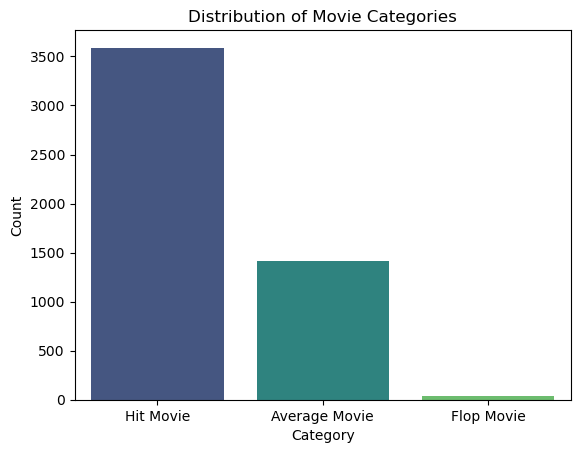

In [14]:

# Visualize the distribution of categories
sns.countplot(x='Score', data=dataset, palette="viridis")
plt.title("Distribution of Movie Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


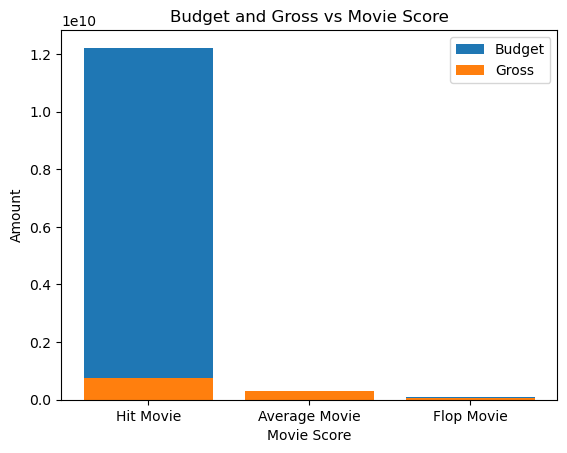

In [15]:
# Plot a bar chart for budget and gross
plt.bar(dataset['Score'], dataset['budget'], label='Budget')
plt.bar(dataset['Score'], dataset['gross'], label='Gross')
plt.xlabel('Movie Score')
plt.ylabel('Amount')
plt.title('Budget and Gross vs Movie Score')
plt.legend()
plt.show()

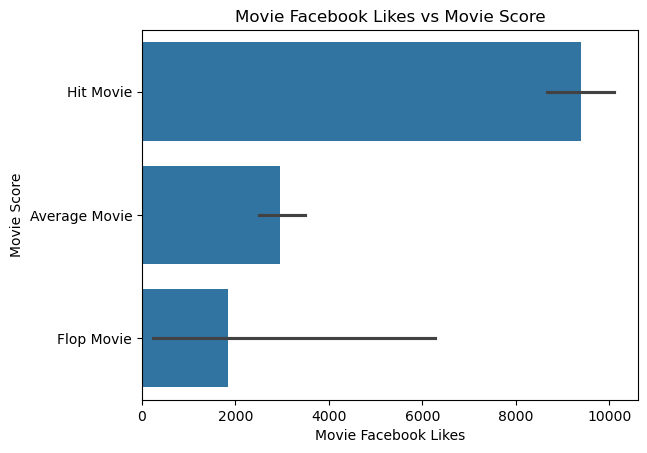

In [16]:

# Plot a bar chart
sns.barplot(x='movie_facebook_likes', y='Score', data=dataset)
plt.xlabel('Movie Facebook Likes')
plt.ylabel('Movie Score')
plt.title('Movie Facebook Likes vs Movie Score')
plt.show()

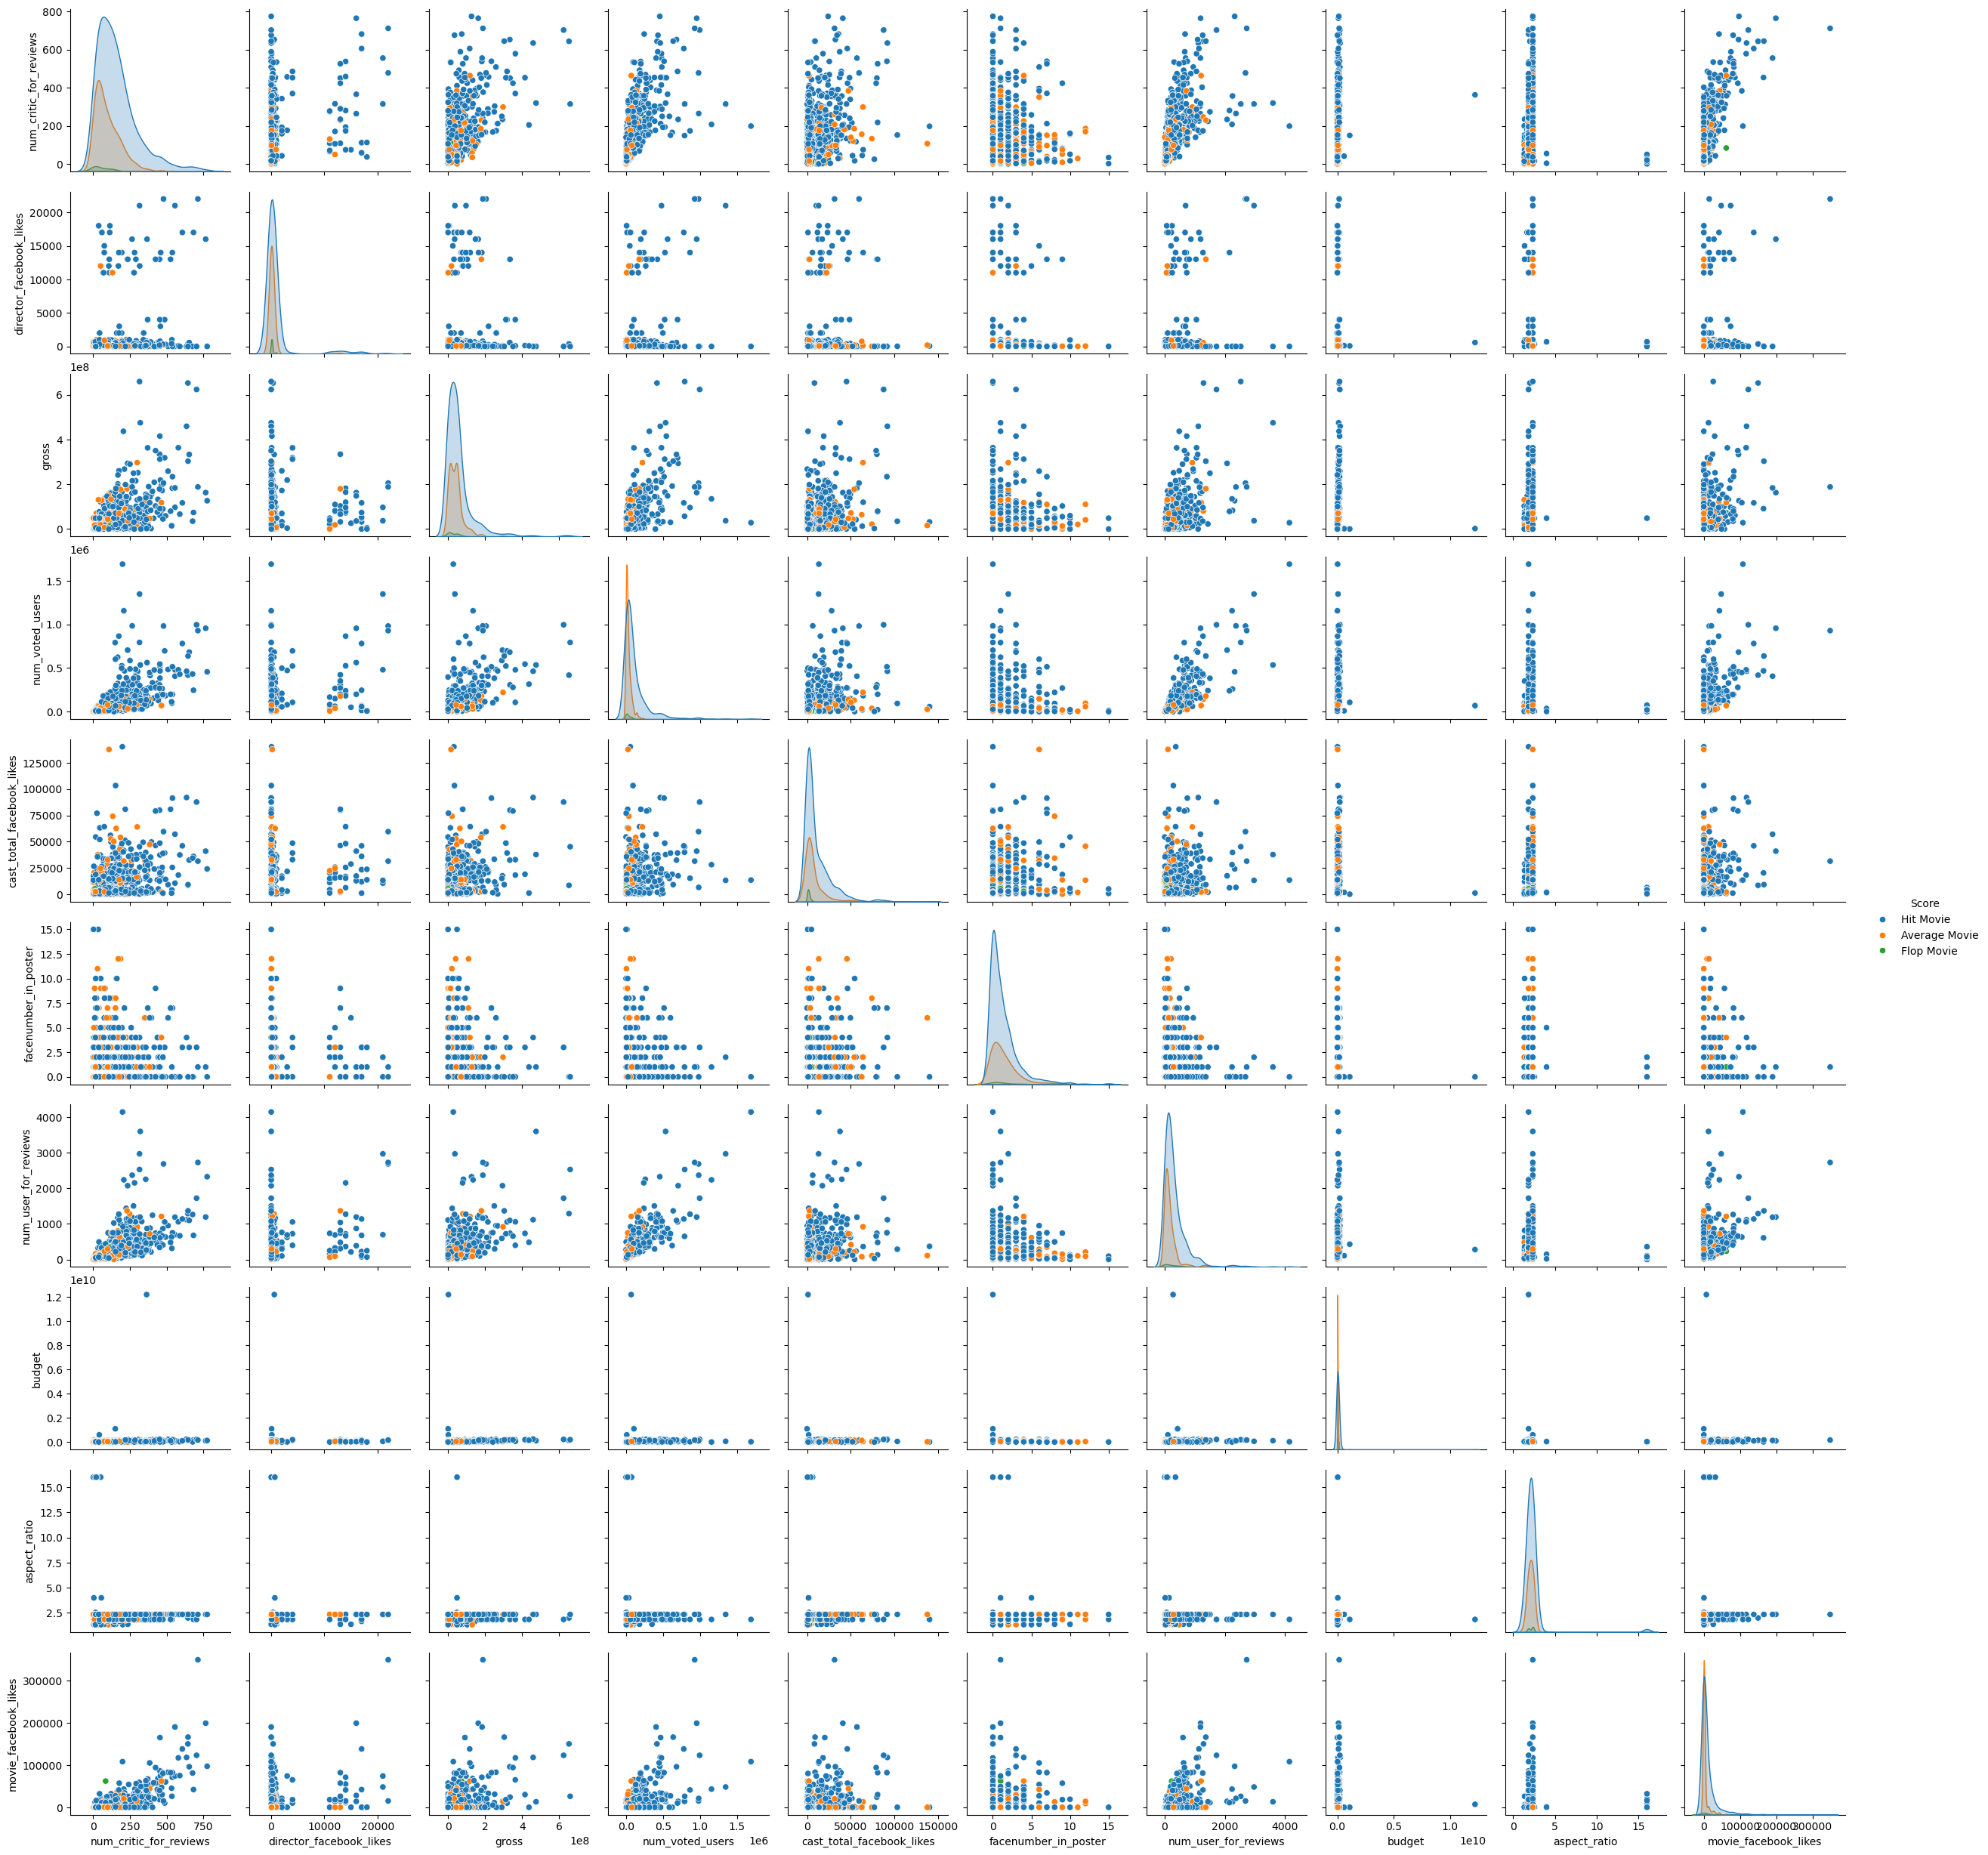

In [17]:
# Sampling the dataset (e.g., 1000 rows)
sampled_dataset = dataset.sample(n=1000, random_state=42)
sns.pairplot(data=sampled_dataset, hue='Score')
plt.show()


### Lable encoding


In [18]:
from sklearn.preprocessing import LabelEncoder

le_dir = LabelEncoder()
le_lang = LabelEncoder()
le_ac1 = LabelEncoder()
le_ac2 = LabelEncoder()
le_ac3 = LabelEncoder()
le_gen = LabelEncoder()
le_coun = LabelEncoder()
le_ra = LabelEncoder()
le_keyw = LabelEncoder()


dataset["director_name"] = le_dir.fit_transform(dataset["director_name"])
dataset["language"] = le_lang.fit_transform(dataset["language"])
dataset["actor_1_name"] = le_ac1.fit_transform(dataset["actor_1_name"])
dataset["actor_2_name"] = le_ac2.fit_transform(dataset["actor_2_name"])
dataset["actor_3_name"] = le_ac3.fit_transform(dataset["actor_3_name"])
dataset["genres"] = le_gen.fit_transform(dataset["genres"])
dataset["country"] = le_coun.fit_transform(dataset["country"])
dataset["content_rating"] = le_ra.fit_transform(dataset["content_rating"])
dataset["plot_keywords"] = le_keyw.fit_transform(dataset["plot_keywords"])


### Ordinal Ecoding

In [19]:
dataset["Score"].unique()

array(['Hit Movie', 'Average Movie', 'Flop Movie'], dtype=object)

In [20]:
ord_data = [['Hit Movie', 'Average Movie', 'Flop Movie']]

In [21]:

from sklearn.preprocessing import OrdinalEncoder
oen = OrdinalEncoder(categories= ord_data)

In [22]:
dataset["Score"] = oen.fit_transform(dataset[["Score"]])

In [23]:
dataset.columns

Index(['director_name', 'num_critic_for_reviews', 'director_facebook_likes',
       'actor_2_name', 'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'aspect_ratio', 'movie_facebook_likes',
       'Score'],
      dtype='object')

In [24]:
dataset

,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,aspect_ratio,movie_facebook_likes,Score
0,922,723.000000,0.000000,1405,7.605058e+08,106,264,886204,4834,3437,0.0,1318,3054.000000,11,62,7,2.370000e+08,1.78,33000,0.0
1,794,302.000000,563.000000,2216,3.094042e+08,100,976,471220,48350,1390,0.0,4281,1238.000000,11,62,7,3.000000e+08,2.35,0,0.0
2,2021,602.000000,0.000000,2487,2.000742e+08,127,349,275868,11700,3129,1.0,2078,994.000000,11,61,7,2.450000e+08,2.35,85000,0.0
3,373,813.000000,22000.000000,532,4.481306e+08,287,1963,1144337,106759,1763,0.0,3482,2701.000000,11,62,7,2.500000e+08,2.35,164000,0.0
4,600,140.194272,131.000000,2431,4.846841e+07,753,522,8,143,300,0.0,1583,272.770808,11,62,9,3.975262e+07,2.35,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2047,1.000000,2.000000,671,4.846841e+07,605,594,629,2283,705,2.0,4138,6.000000,11,10,9,3.975262e+07,2.35,84,0.0
5039,2157,43.000000,686.509212,2904,4.846841e+07,735,1445,73839,1753,2973,1.0,3339,359.000000,11,62,10,3.975262e+07,16.0,32000,0.0
5040,186,13.000000,0.000000,1972,4.846841e+07,823,612,38,0,798,0.0,1583,3.000000,11,62,9,1.400000e+03,2.35,16,0.0
5041,453,14.000000,0.000000,649,1.044300e+04,638,31,1255,2386,1004,5.0,1583,9.000000,11,62,7,3.975262e+07,2.35,660,0.0


### Outlier

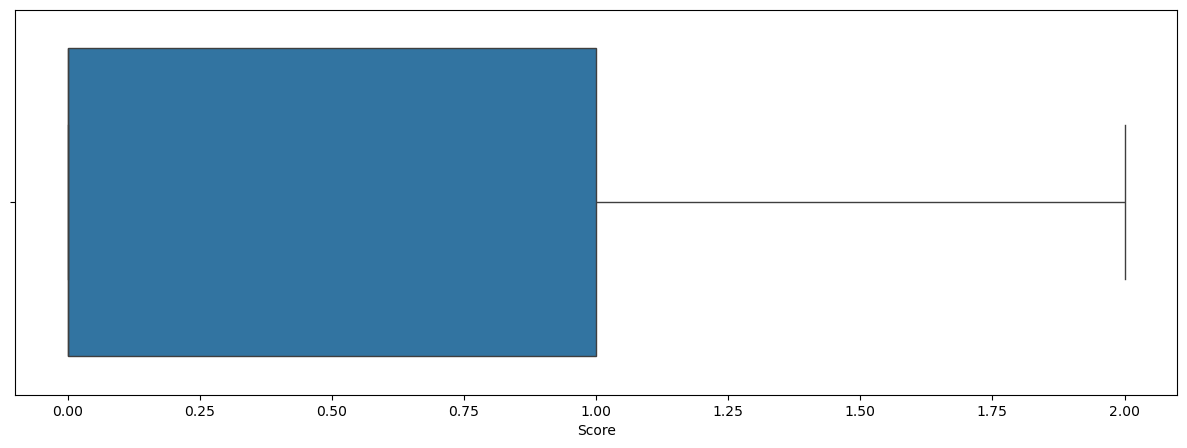

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "Score",data=dataset)
plt.show()

In [26]:
dataset["Score"].unique()

array([0., 1., 2.])

### Feature Scaling (Standarization)

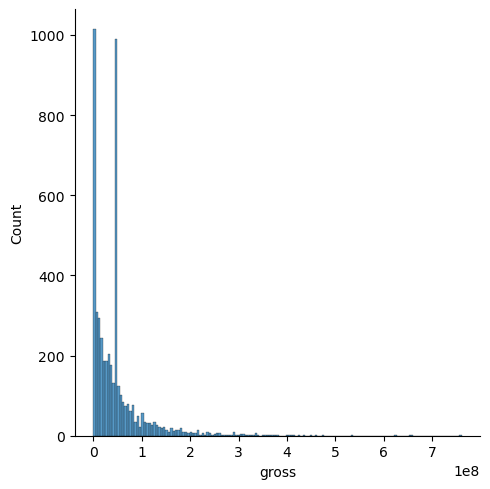

In [27]:
sns.displot(dataset['gross'])
plt.show()

In [28]:
ss = StandardScaler()
dataset["gross"]= pd.DataFrame(ss.fit_transform(dataset[["gross"]]), columns=["x"])

In [29]:
dataset.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,aspect_ratio,movie_facebook_likes,Score
0,922,723.000000,0.0,1405,11.455463,106,264,886204,4834,3437,0.0,1318,3054.000000,11,62,7,2.370000e+08,1.78,33000,0.0
1,794,302.000000,563.0,2216,4.198009,100,976,471220,48350,1390,0.0,4281,1238.000000,11,62,7,3.000000e+08,2.35,0,0.0
2,2021,602.000000,0.0,2487,2.439077,127,349,275868,11700,3129,1.0,2078,994.000000,11,61,7,2.450000e+08,2.35,85000,0.0
3,373,813.000000,22000.0,532,6.429881,287,1963,1144337,106759,1763,0.0,3482,2701.000000,11,62,7,2.500000e+08,2.35,164000,0.0
4,600,140.194272,131.0,2431,0.000000,753,522,8,143,300,0.0,1583,272.770808,11,62,9,3.975262e+07,2.35,0,0.0


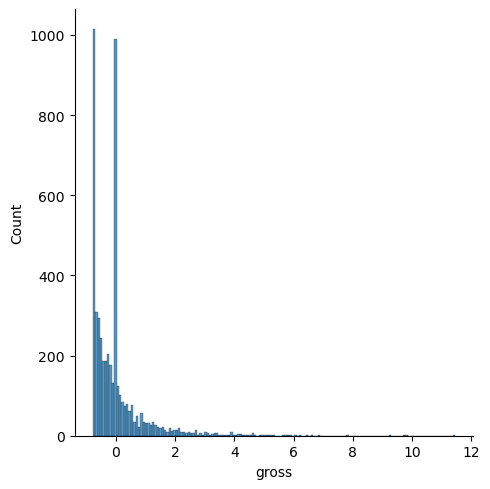

In [30]:
sns.displot(dataset['gross'])
plt.show()

In [31]:
dataset

,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,aspect_ratio,movie_facebook_likes,Score
0,922,723.000000,0.000000,1405,11.455463,106,264,886204,4834,3437,0.0,1318,3054.000000,11,62,7,2.370000e+08,1.78,33000,0.0
1,794,302.000000,563.000000,2216,4.198009,100,976,471220,48350,1390,0.0,4281,1238.000000,11,62,7,3.000000e+08,2.35,0,0.0
2,2021,602.000000,0.000000,2487,2.439077,127,349,275868,11700,3129,1.0,2078,994.000000,11,61,7,2.450000e+08,2.35,85000,0.0
3,373,813.000000,22000.000000,532,6.429881,287,1963,1144337,106759,1763,0.0,3482,2701.000000,11,62,7,2.500000e+08,2.35,164000,0.0
4,600,140.194272,131.000000,2431,0.000000,753,522,8,143,300,0.0,1583,272.770808,11,62,9,3.975262e+07,2.35,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2047,1.000000,2.000000,671,0.000000,605,594,629,2283,705,2.0,4138,6.000000,11,10,9,3.975262e+07,2.35,84,0.0
5039,2157,43.000000,686.509212,2904,0.000000,735,1445,73839,1753,2973,1.0,3339,359.000000,11,62,10,3.975262e+07,16.0,32000,0.0
5040,186,13.000000,0.000000,1972,0.000000,823,612,38,0,798,0.0,1583,3.000000,11,62,9,1.400000e+03,2.35,16,0.0
5041,453,14.000000,0.000000,649,-0.779606,638,31,1255,2386,1004,5.0,1583,9.000000,11,62,7,3.975262e+07,2.35,660,0.0


# Step 4: Define the target and input features

In [32]:
x = dataset.drop(columns=['Score'])
y = dataset["Score"]
x

,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,aspect_ratio,movie_facebook_likes
0,922,723.000000,0.000000,1405,11.455463,106,264,886204,4834,3437,0.0,1318,3054.000000,11,62,7,2.370000e+08,1.78,33000
1,794,302.000000,563.000000,2216,4.198009,100,976,471220,48350,1390,0.0,4281,1238.000000,11,62,7,3.000000e+08,2.35,0
2,2021,602.000000,0.000000,2487,2.439077,127,349,275868,11700,3129,1.0,2078,994.000000,11,61,7,2.450000e+08,2.35,85000
3,373,813.000000,22000.000000,532,6.429881,287,1963,1144337,106759,1763,0.0,3482,2701.000000,11,62,7,2.500000e+08,2.35,164000
4,600,140.194272,131.000000,2431,0.000000,753,522,8,143,300,0.0,1583,272.770808,11,62,9,3.975262e+07,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2047,1.000000,2.000000,671,0.000000,605,594,629,2283,705,2.0,4138,6.000000,11,10,9,3.975262e+07,2.35,84
5039,2157,43.000000,686.509212,2904,0.000000,735,1445,73839,1753,2973,1.0,3339,359.000000,11,62,10,3.975262e+07,16.0,32000
5040,186,13.000000,0.000000,1972,0.000000,823,612,38,0,798,0.0,1583,3.000000,11,62,9,1.400000e+03,2.35,16
5041,453,14.000000,0.000000,649,-0.779606,638,31,1255,2386,1004,5.0,1583,9.000000,11,62,7,3.975262e+07,2.35,660


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Step-5 Model Training and Evalution

### DecisionTree Classifier 

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(71.75421209117938, 100.0)

### Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [38]:
lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100

(72.15064420218039, 70.84779375309867)

### Cross Validation (k-Fold)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [40]:
cvs = cross_val_score(DecisionTreeClassifier(), x, y, cv=KFold (n_splits=10))
cvs

array([0.78811881, 0.65940594, 0.68316832, 0.73809524, 0.71230159,
       0.74603175, 0.7202381 , 0.72222222, 0.69047619, 0.67261905])

In [41]:
print(f"Cross_Validation scores {cvs}")
print(f"Mean Accuracy: {cvs.mean():.2f}")
print(f"Standard Deviation: {cvs.std():.2f}")

Cross_Validation scores [0.78811881 0.65940594 0.68316832 0.73809524 0.71230159 0.74603175
 0.7202381  0.72222222 0.69047619 0.67261905]
Mean Accuracy: 0.71
Standard Deviation: 0.04


## Ensemble Learning

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### SVC

In [43]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [44]:
sv.score(x_test, y_test)*100 , sv.score(x_train, y_train)*100

(72.24975222993062, 70.8973723351512)

### BaggingClassifier

In [45]:
bc = BaggingClassifier(estimator=SVC(), n_estimators=50)
bc.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50)

In [46]:
bc.score(x_test, y_test)*100, bc.score(x_train, y_train)*100

(72.24975222993062, 70.8973723351512)

## Random Forest Classifier

In [47]:
rfc = RandomForestClassifier(n_estimators=57, max_depth=14, criterion='log_loss', min_samples_split=2, random_state=42) 
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=14, n_estimators=57,
                       random_state=42)

In [48]:
rfc.score(x_test, y_test)*100, rfc.score(x_train, y_train)*100

(79.58374628344896, 99.60337134357957)

In [49]:
# make prediction
y_pred = rfc.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### RandomizedSearchCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
df  = { "n_estimators" : [i for i in range(10,100)],
"criterion" : ["gini", "entropy", "log_loss"],
"max_depth" : [i for i in range(2,20)]
 }

In [52]:
rd = RandomizedSearchCV(RandomForestClassifier(), param_distributions=df, n_iter=10)
rd.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]})

In [53]:
rd.best_params_

{'n_estimators': 83, 'max_depth': 19, 'criterion': 'gini'}

In [54]:
rd.best_score_

0.7883042607949671

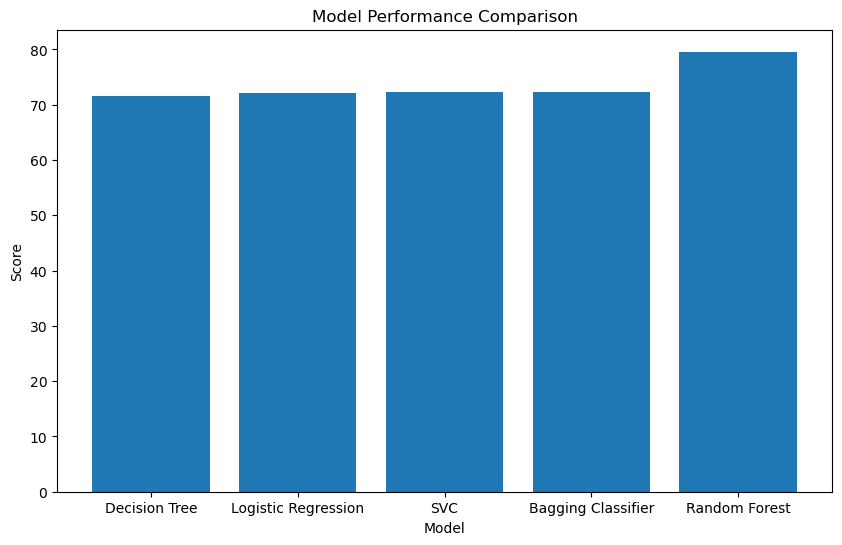

In [55]:
# Define the models and their scores
models = ['Decision Tree', 'Logistic Regression', 'SVC', 'Bagging Classifier', 'Random Forest']
scores = [71.65, 72.15, 72.24, 72.24, 79.58]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.show()

## Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
model_pred = rfc.predict(x_test)

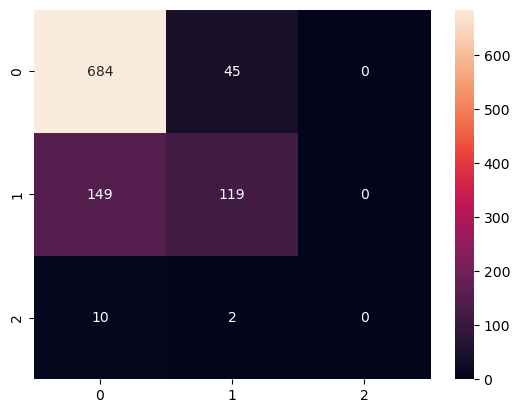

In [58]:

sns.heatmap(confusion_matrix(y_test, model_pred), annot=True, fmt='d')
plt.show()

## Classification Report

In [59]:

class_rep = classification_report(y_test, y_pred)
print('classification_report')
print(class_rep)

classification_report
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       729
         1.0       0.72      0.44      0.55       268
         2.0       0.00      0.00      0.00        12

    accuracy                           0.80      1009
   macro avg       0.51      0.46      0.47      1009
weighted avg       0.78      0.80      0.77      1009



### Accuracy Score

In [60]:
As = accuracy_score(y_test, rfc.predict(x_test))
print(f"accuracy_score {As}")

accuracy_score 0.7958374628344896


### Prediction Script to Predict the IMBD Score on Custom Input 

In [61]:
input_data = pd.DataFrame({
    'director_name': [794],
    'num_critic_for_reviews': [302.000000],
    'director_facebook_likes': [563.0],
    'actor_2_name': [2216],
    'gross': [4.198009],
    'genres': [100],
    'actor_1_name': [976],
    'num_voted_users': [471220],
    'cast_total_facebook_likes': [48350],
    'actor_3_name': [1390],
    'facenumber_in_poster': [1],
    'plot_keywords': [4281],
    'num_user_for_reviews': [1238.0],
    'language': [11],
    'country': [62],
    'content_rating': [7],
    'budget': [300000000.0],
    'aspect_ratio': [2.35],
    'movie_facebook_likes': [0]
})

# Predict the Score
predicted_Score = rfc.predict(input_data)[0]
print(predicted_Score)

0.0


## Saving Trained model

In [62]:
import joblib
joblib.dump(rfc, "RandomForestClassifier_model.pkl")

['RandomForestClassifier_model.pkl']

In [63]:
# Loading the model and predicting the movie Score
movie_score = joblib.load("RandomForestClassifier_model.pkl")
input_data = pd.DataFrame({
    'director_name': [794],
    'num_critic_for_reviews': [302.000000],
    'director_facebook_likes': [563.0],
    'actor_2_name': [2216],
    'gross': [4.198009],
    'genres': [100],
    'actor_1_name': [976],
    'num_voted_users': [471220],
    'cast_total_facebook_likes': [48350],
    'actor_3_name': [1390],
    'facenumber_in_poster': [1],
    'plot_keywords': [4281],
    'num_user_for_reviews': [1238.0],
    'language': [11],
    'country': [62],
    'content_rating': [7],
    'budget': [300000000.0],
    'aspect_ratio': [2.35],
    'movie_facebook_likes': [0]
})


# predicting the success of movies 
predicted_score = movie_score.predict(input_data)[0]  

# Categorizing IMDB Scores
if predicted_score == 0:
    print("Flop Movie")
elif predicted_score == 1:
    print("Average Movie")
elif predicted_score == 2:
    print("Hit Movie")
else:
    print("Invalid Score")


Flop Movie
